# MACHINE LEARING CLASS 1

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split 


In [3]:
df = pd.read_csv('Student_Performance.csv')

In [4]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (127, 6)


In [8]:
df = df.drop_duplicates()

In [9]:
df.count()

Hours Studied                       9873
Previous Scores                     9873
Extracurricular Activities          9873
Sleep Hours                         9873
Sample Question Papers Practiced    9873
Performance Index                   9873
dtype: int64

In [10]:
print(df.isnull().sum()) 

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [11]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [12]:
df = df.rename(columns={"Hours Studied":"Hours_Studied","Previous Scores":"Previous_Scores","Extracurricular Activities":"Extracurricular_Activities", "Sleep Hours":"Sleep_Hours",
                        "Sample_Question_Papers_Practiced":"Question_Practiced","Performance Index":"Performance_Index"})


In [13]:
from sklearn.preprocessing import LabelEncoder # to convert string to num level

le=LabelEncoder()
df.Extracurricular_Activities = le.fit_transform(df.Extracurricular_Activities)
df

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample Question Papers Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


<Axes: >

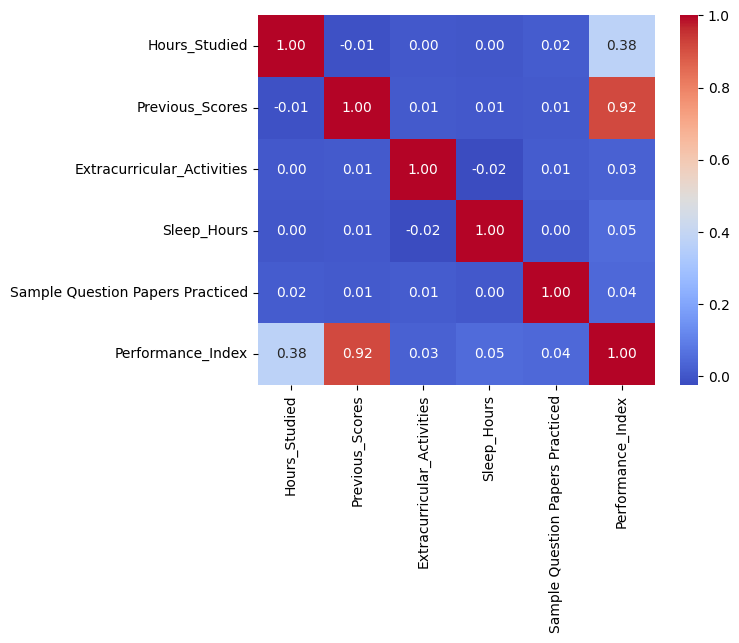

In [14]:
import seaborn as sns
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',fmt=".2f")

In [15]:
print(corr_matrix)

NameError: name 'corr_matrix' is not defined

In [16]:
X = df['Previous_Scores']
Y= df['Performance_Index']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.25 )

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.linear_model  import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train.values.reshape(-1,1),Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred = lr.predict(X_test.values.reshape(-1,1))

In [1]:
plt.Figure(figsize=(15,10))
plt.scatter(Y_test,y_pred)
plt.xlabel('Original' ,color ='r')
plt.ylabel('Predicted')
plt.title('Original vs Predicted')
plt.show()

NameError: name 'plt' is not defined

In [25]:
mean_absolute_error(Y_test,y_pred)

6.68551038251135

In [26]:
mean_absolute_percentage_error(Y_test,y_pred)

0.1467760315120038

In [27]:
mean_squared_error(Y_test,y_pred)

60.70861006844687